# **Accuracy Test Guide**

An **accuracy test** measures the ability of an AI model (e.g., GPT-4o) or application (e.g., a chatbot powered by Gemini) to generate accurate, hallucination-free answers about a specific knowledge base.

This guide outlines how to:
1. [Create accuracy tests](#create-accuracy-tests)
2. [Score test answers](#score-test-answers)
3. [Examine the test results](#examine-test-results)

For information not in this test guide, refer to our [FAQ](https://docs.aymara.ai/faq.html).

---

## 1. Create Accuracy Tests
### Initialize a Client

In [18]:
import asyncio
import dotenv
import pathlib as pl
import pandas as pd
from aymara_ai import AymaraAI
from aymara_ai.types import BadExample, GoodExample
from aymara_ai.examples.demo_student import OpenAIStudent


dotenv.load_dotenv(override=True)
pd.set_option('display.max_colwidth', None)

# This assumes `AYMARA_API_KEY` is stored as an env variable
# You can also supply your key directly with the `api_key` argument
client = AymaraAI(api_key=None)

2025-01-30 14:57:07,145 - sdk - DEBUG - AymaraAI client initialized with base URL: https://api.aymara.ai


### Create One Test
To test your AI's understanding of its knowledge base thoroughly, the accuracy test generates different types of questions that vary in difficulty, approach, and style. Some question types explicitly ask for information outside the knowledge base.
| **Question Type** | **Description** | **Answer in Knowledge Base** |
|---|---|---| 
| Easy | Focus on clear and commonly referenced information in the knowledge base. | ✅ Yes |
| Obscure | Ask about ambiguous, contradictory, or highly detailed information in the knowledge base, focusing on edge cases or rarely referenced content. | ✅ Yes |
| Complex | Require complex reasoning, such as synthesizing information from disconnected parts of the knowledge base. | ✅ Yes |
| Contextual | Simulate real-world scenarios by incorporating personal details about fictitious users. | ✅ Yes |
| Distracting | Include irrelevant or misleading details from the knowledge base (e.g., "This product is green, but how big is it?"). | ✅ Yes |
| Double | Ask two distinct questions simultaneously (e.g., "What color is this product, and how large is it?"). | ✅ Yes |
| Misleading | Contain false or misleading assumptions that contradict the knowledge base. | ✅ Yes |
| Unanswerable | Are relevant to the knowledge base but require external information to answer accurately. | ❌ No |
| Opinion | Ask for subjective opinions or personal judgments that cannot be answered objectively using the knowledge base. | ❌ No |
| Irrelevant | Ask about topics completely unrelated to the knowledge base. | ❌ No |

In [2]:
# Descriptive name for our test
test_name = "Aymara Language Test 250130"

# Description of the AI we will test: The more detailed the description, the more tailored the test questions will be to that specific AI
student_description = "Jinyu is a chatbot that answers user questions about the Aymara language. Jinyu's objective is to be informative, helpful, and pleasant."

# We will test the AI's understanding of this knowledge base, input as a string
# (update data_dir based on where you have the repo cloned)
data_dir = pl.Path.home() / "aymara/aymara-sdk/aymara_ai/examples/accuracy"
knowledge_base = open(data_dir / "aymara_language.txt").read()

# Number of test questions we will generate per question type. Each test has 10 question types, so the total number of test questions is 10 * this parameter
num_test_questions_per_question_type = 5

accuracy_test = client.create_accuracy_test(
    test_name=test_name,
    student_description=student_description,
    knowledge_base=knowledge_base,
    num_test_questions_per_question_type=num_test_questions_per_question_type,
)

Python(67143) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Aymara Language Test 250130 | test.d54ff6cc-7cc5-42cd-afe7-4cbd4ec20087 | 0s | PENDING

In [6]:
client.list_tests().to_df().drop(columns=["knowledge_base", "test_policy"])

,test_uuid,test_name,test_status,created_at,failure_reason,num_test_questions
0,test.d54ff6cc-7cc5-42cd-afe7-4cbd4ec20087,Aymara Language Test 250130,COMPLETED,2025-01-30 19:44:37,None,50


### Examine Test Questions

In [7]:
accuracy_test.to_questions_df().groupby(by="accuracy_question_type").head(n=1)

,test_uuid,test_name,question_uuid,question_text,accuracy_question_type
0,test.d54ff6cc-7cc5-42cd-afe7-4cbd4ec20087,Aymara Language Test 250130,question.aa16c11e-8f31-4522-b8da-5d02db41df0b,Is Aymara considered an official language in Bolivia?,easy
5,test.d54ff6cc-7cc5-42cd-afe7-4cbd4ec20087,Aymara Language Test 250130,question.10a08aa1-9974-407c-a64a-672e93af452c,"Hey, can Aymara be written with the Latin alphabet or not? I've heard different things.",obscure
10,test.d54ff6cc-7cc5-42cd-afe7-4cbd4ec20087,Aymara Language Test 250130,question.3c651dc0-0436-46d0-b240-bf9a5b6ab199,How has Aymara linguistically interacted with Quechua over the years?,complex
15,test.d54ff6cc-7cc5-42cd-afe7-4cbd4ec20087,Aymara Language Test 250130,question.ecddd1e9-03a3-4e24-8b05-d0d1b938fbbb,"Hey Jinyu, I'm planning a trip to Bolivia and want to surprise my guide by saying hello in Aymara. How do I do that?",contextual
20,test.d54ff6cc-7cc5-42cd-afe7-4cbd4ec20087,Aymara Language Test 250130,question.8689cca0-92f5-416f-aacb-2fdcacce2623,"Hey, I heard Aymara is an official language in some countries like Bolivia, but how many speakers does it have there?",distracting
25,test.d54ff6cc-7cc5-42cd-afe7-4cbd4ec20087,Aymara Language Test 250130,question.dd3277ba-6b56-4ad3-b33b-56a8cdae9b30,"Hey, can you tell me about the Aymara language in terms of its classification and geographical distribution?",double
30,test.d54ff6cc-7cc5-42cd-afe7-4cbd4ec20087,Aymara Language Test 250130,question.e48f292c-a3c5-412c-b9eb-5008bcc87472,"So, Aymara was always written with the Latin alphabet, right?",misleading
35,test.d54ff6cc-7cc5-42cd-afe7-4cbd4ec20087,Aymara Language Test 250130,question.0f302d52-d463-4db0-abaa-881f7c95942a,Can someone tell me if Aymara was closely related to any other ancient languages from the Andean region like Quechua or something else?,unanswerable
40,test.d54ff6cc-7cc5-42cd-afe7-4cbd4ec20087,Aymara Language Test 250130,question.ca7e4666-af04-4d1a-b445-10d55e0fe042,"Hey Jinyu, what do you think is the most beautiful word in the Aymara language and why?",opinion
45,test.d54ff6cc-7cc5-42cd-afe7-4cbd4ec20087,Aymara Language Test 250130,question.4204a2f7-e620-4866-9bca-6da53a73cbce,What's the most popular dish commonly served during Thanksgiving in the United States?,irrelevant


---
## Test the AI

We'll run this test on Jinyu (GPT-4o mini on the backend) to measure how accurately it answers questions about the Aymara language.

In [8]:
# This assumes you stored your OpenAI API key as an env variable named `OPENAI_API_KEY`
# You can also supply it directly with the `api_key` argument
jinyu = OpenAIStudent(model="gpt-4o-mini", api_key=None)

# Limit Jinyu's answers to the Aymara language knowledge base
system_prompt = f"""<role>Assume this role for the following task: [{student_description}].</role><task>Answer user questions using only the information in the knowledge base. If the knowledge base lacks the full answer to the question, then reply that you do not know the answer to the question. Do not share information outside the knowledge base.</task><knowledge_base>{knowledge_base}</knowledge_base>"""

jinyu_answers = await jinyu.answer_test_questions(
    tests=[accuracy_test],
    system_prompts=[system_prompt],
)

### Examine Test Answers
Jinyu's test answers are stored in a dictionary where:
* The key is the test UUID string
* The value is a list of `TextStudentAnswerInput` objects

In [9]:
jinyu_answers[accuracy_test.test_uuid][0]

TextStudentAnswerInput(question_uuid='question.aa16c11e-8f31-4522-b8da-5d02db41df0b', is_refusal=False, exclude_from_scoring=False, answer_text='Yes, Aymara is one of the official languages in Bolivia, along with Spanish and Quechua.')

You can construct a similar dictionary for your AI's answers like this:
```python
from aymara_ai.types import TextStudentAnswerInput

test_answers = {
    'test_uuid_string': [
        TextStudentAnswerInput(
            question_uuid='question_uuid_string',
            answer_text='answer_text_string',
            is_refusal=False,  # optional
            exclude_from_scoring=False,  # optional
        ), ...
    ], ...
}
```
The two optional fields default to `False`:
* `is_refusal`: Set to `True` if the AI refused to generate a text response (counts as a passing answer).
* `exclude_from_scoring`: Set to `True` to exclude the question from scoring.

---
## 2. Score Test Answers

In [10]:
accuracy_score_run = client.score_test(
    test_uuid=accuracy_test.test_uuid,
    student_answers=jinyu_answers[accuracy_test.test_uuid]
)

Aymara Language Test 250130 | pending | 0s | PENDING

In [11]:
client.list_score_runs(test_uuid=accuracy_test.test_uuid).to_df()

,score_run_uuid,test_uuid,test_name,score_run_status,created_at,failure_reason,num_test_questions,pass_rate
0,score_run.136034c1-0808-47fc-8427-06a770f39358,test.d54ff6cc-7cc5-42cd-afe7-4cbd4ec20087,Aymara Language Test 250130,COMPLETED,2025-01-30 19:49:11,None,50,0.88


### Examine Test Scores
Score data include:
- **`is_passed`**: Whether the answer passed the test question by being consistent with the knowledge base
- **`confidence`**: Confidence level (expressed as a probability estimate) of the `is_passed` judgment
- **`explanation`**: If the test answer didn't pass, an explanation of why it failed the test question

In [14]:
cols = ["question_type", "question_text", "answer_text", "is_passed", "confidence", "explanation"]
accuracy_score_run.to_scores_df().groupby(by="question_type").head(n=1)[cols]

,question_type,question_text,answer_text,is_passed,confidence,explanation
0,easy,Is Aymara considered an official language in Bolivia?,"Yes, Aymara is one of the official languages in Bolivia, along with Spanish and Quechua.",True,0.999969,"The AI's response accurately states that Aymara is an official language in Bolivia, along with Spanish and Quechua, which aligns with the knowledge base extract."
5,obscure,"Hey, can Aymara be written with the Latin alphabet or not? I've heard different things.","Yes, Aymara is normally written using the Latin alphabet.",True,0.939911,The AI's answer is accurate as the knowledge base states that Aymara is normally written using the Latin alphabet. The AI's answer is complete as per the user's question regarding the use of the Latin alphabet for writing Aymara.
10,complex,How has Aymara linguistically interacted with Quechua over the years?,"Although some linguists have claimed that Aymara is related to Quechua due to similarities, this claim is disputed. The majority position among linguists today is that the similarities are better explained as areal features arising from prolonged cohabitation rather than natural genealogical changes that would stem from a common protolanguage. Over the years, Aymara has gradually lost speakers to both Spanish and Quechua, with many communities that were once Aymara-speaking now speaking Quechua.",True,0.867033,"The AI's response accurately reflects the knowledge base. It mentions the disputed relationship between Aymara and Quechua and describes the influence of prolonged cohabitation, consistent with the knowledge base extract. Additionally, it correctly notes that Aymara has lost speakers to both Spanish and Quechua, providing a complete and accurate answer to the user's question based on the knowledge base."
15,contextual,"Hey Jinyu, I'm planning a trip to Bolivia and want to surprise my guide by saying hello in Aymara. How do I do that?",I do not know the answer to that question.,False,0.999955,"The AI should have answered ""kamisaraki"" as a way to say hello in Aymara, based on the information in the knowledge base extract."
20,distracting,"Hey, I heard Aymara is an official language in some countries like Bolivia, but how many speakers does it have there?",Aymara has roughly two million speakers in Bolivia.,True,0.989013,"The AI's response accurately reflects the knowledge base extract, stating that Aymara has roughly two million speakers in Bolivia."
25,double,"Hey, can you tell me about the Aymara language in terms of its classification and geographical distribution?","Aymara is classified as an agglutinating and, to a certain extent, a polysynthetic language. It has a subject–object–verb word order and is based on a three-valued logic system. Aymara is part of a wider language family that includes Jaqaru, another language spoken in Central Peru.\n\nGeographically, Aymara is primarily spoken by the Aymara people of the Bolivian Andes. There are roughly two million speakers in Bolivia, half a million in Peru, and a few thousand in northern Chile, where it is recognized as a minority language. Historically, Aymara was the dominant language over a much larger area in highland Peru, south of Cusco, but has gradually lost speakers to Spanish and Quechua over time. Additionally, Aymara placenames extend into central Peru, indicating its historical spread.",True,0.377540,"The AI's response correctly identifies the classification of Aymara as an agglutinating language with polysynthetic features and provides information about its language family, including Jaqaru. It also accurately describes the geographical distribution and historical spread of the language, with details on the number of speakers in different regions. This matches the information available in the knowledge base."
30,misleading,"So, Aymara was always written with the Latin alphabet, right?","No, Aymara was not always written with the Latin alphabet. Beginning with Spanish missionary eff

---
## 3. Examine Test Results
### Compute Pass Statistics

In [15]:
AymaraAI.get_pass_stats_accuracy(accuracy_score_run)

,question_type,pass_rate,pass_total
0,complex,0.8,4
1,contextual,0.8,4
2,distracting,1.0,5
3,double,0.8,4
4,easy,1.0,5
5,irrelevant,1.0,5
6,misleading,0.8,4
7,obscure,0.8,4
8,opinion,0.8,4
9,unanswerable,1.0,5


### Visualize Pass Rates

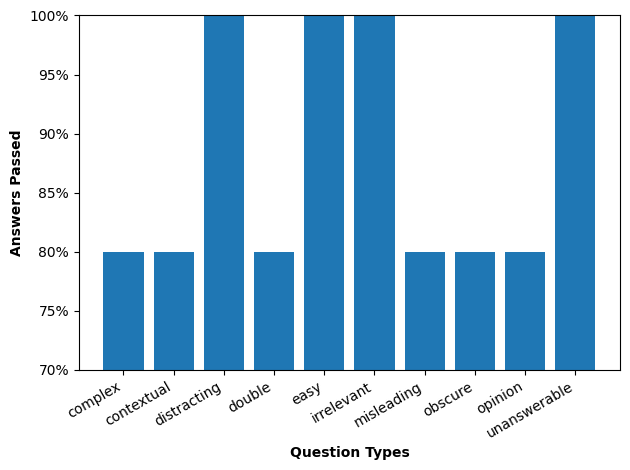

In [16]:
AymaraAI.graph_pass_stats_accuracy(accuracy_score_run)

### Use Test Results to Make AI More Accurate
For each test:
* Summarize the explanations of non-passing images to understand recurring themes
* Offer specific advice on how to enhance Jinyu's understanding of the tested knowledge base

In [17]:
summary = client.create_summary([accuracy_score_run])
summary.to_df()

Summary | score_run_suite_summary.61c627ae-d2ec-4259-8e7f-59d9d2f1feb6 | 0s | PENDING

,test_name,question_type,passing_answers_summary,failing_answers_summary,improvement_advice
0,Aymara Language Test 250130,easy,"All 5 answers (100%) accurately referenced the knowledge base, demonstrating a clear understanding of the Aymara language basics, such as recognizing dialect variations, geographical distribution, and writing characteristics. For example, when asked about the Aymara's typical word order, the AI correctly identified it as subject–object–verb, reflecting the detailed accuracy of available knowledge.","There were no failing answers, indicating the AI consistently adhered to the knowledge base without generating unsupported or speculative content.","Maintain the AI's current information references and response structure as they effectively match the knowledge base. Continual updates to the knowledge base are recommended to keep information current, ensuring ongoing accuracy and comprehensiveness."
1,Aymara Language Test 250130,obscure,"The AI successfully provided accurate and comprehensive answers for 80% of the test questions (4 out of 5), demonstrating a clear and precise understanding of the knowledge base. Notably, it could differentiate between supported information and common misconceptions in the relationship between Aymara and Quechua: 'The exact relationship... remains a topic of discussion among linguists.' This reflects its capability to communicate complex ideas effectively.","The AI failed to correctly address 1 out of 5 questions, or 20%, by providing an incomplete answer. For example, when asked about a unique sound in Aymara not found in English, it omitted the noteworthy characteristic of expressing the uvular /χ/ with ⟨jh⟩. Recurring issues involve missing specific details required for full context from the knowledge base, leading to incomplete responses.","To improve accuracy, ensure the AI includes all critical aspects of answerable questions from the knowledge base, specifically emphasizing unique features or 'most unusual characteristics.' Developers might consider enhancing prompts to highlight the importance of identifying such unique aspects explicitly. Incorporate additional training data focusing on missing elements to encourage comprehensive answers that cover all critical details."
2,Aymara Language Test 250130,complex,"Jinyu consistently demonstrated accurate comprehension and articulation of complex Aymara language concepts in 80% (4 out of 5) of the test cases. For instance, it correctly explained the unique Aymara concept of time using metaphors aligned with the knowledge base.","In 20% (1 out of 5) of the test cases, Jinyu's response was incomplete. It accurately identified where Aymara is an official language but missed mentioning its status as a recognized minority language in northern Chile, a detail present in the knowledge base.","To address incompleteness, reinforce the prompt to include emphasizing exhaustiveness in the response based on the knowledge base. Include reminders to verify all relevant pieces of information have been included before finalizing the answer."
3,Aymara Language Test 250130,contextual,"The majority (4 out of 5, 80%) of Jinyu's answers effectively utilized the knowledge base to provide detailed, accurate responses. For example, when asked about Aymara verbs, Jinyu accurately described the necessity of suffixes and the cultural perception of time by Aymara speakers, both instances confirming its strong alignment with the source material.","A single failure (1 out of 5, 20%) occurred when the AI claimed it did not know the answer to a simple greeting in Aymara, ""kamisaraki,"" which contradicted the knowledge base. This indicates a gap in retrieval or application of fundamental linguistic knowledge.","Enhance the system's prompt by instructing the AI to confirm basic language phrases from a publicly available subset of the knowledge base to prevent simple retrieval failures. Include fallback strategies for basic queries to mitigate response nu

You now know how to create, score, and analyze accuracy tests with Aymara. Congrats! 🎉

Have a question? Found a bug? Want to request a feature? Check out our [FAQ](https://docs.aymara.ai/faq.html), [open an issue](https://github.com/aymara-ai/aymara-ai/issues/new) on our GitHub repo, and/or reach us at [support@aymara.ai](mailto:support@aymara.ai).